In [1]:
%cd ..

/home/gianscarpe/dev/event-camera


In [3]:
from experimenting.dataset import DHP3DDataset, get_dataloader
from experimenting.dataset.indexes import get_dataset_params
from matplotlib import pyplot as plt
import numpy as np
from albumentations import Compose, CenterCrop
from albumentations.pytorch import ToTensor
import torch
from omegaconf import DictConfig

%matplotlib inline

In [7]:
def display(img):          
        fig, ax = plt.subplots(ncols=img.shape[0], nrows=1,                              
                               figsize=(20,20))                                                                                   
        for i in range(img.shape[0]):                                                                
            ax[i].imshow(img[i])                                                  
            ax[i].axis('off')
        plt.show()

In [289]:
def plot_2d(dvs_frame, sample_gt, sample_pred):
    " To plot image and 2D ground truth and prediction "
    plt.figure()
    plt.imshow(dvs_frame, cmap='gray')
    plt.plot(sample_gt[:,1], sample_gt[:,0], '.', c='red', label='gt')
    plt.plot(sample_pred[:,1], sample_pred[:,0], '.', c='blue', label='pred')
    plt.legend()

## 

In [4]:
# Augmentation
aug = Compose([CenterCrop(256, 256), ToTensor()])

In [5]:
data_dir = '/data/dhp19/time_count_dataset/movements_per_frame'
labels_dir = '/data/dhp19/time_count_dataset/labels'

hparams = DictConfig({'path': data_dir, 'labels_dir' : labels_dir})
file_paths, train_index, val_index, test_index, _ = get_dataset_params(hparams)

LOADED INDEXES! train: 56137 	 val: 14035 	 test: 17543


In [27]:
d = DHP3DDataset(file_paths, labels_dir, val_index, transform=aug)
loader = get_dataloader(d, 32, 2)

In [28]:
batch = next(iter(loader))
x, y = batch

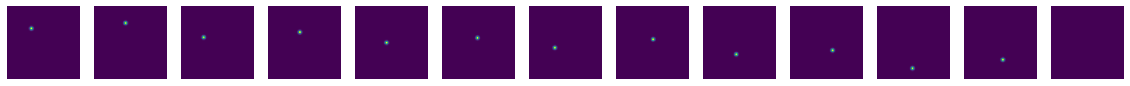

In [265]:
display(y[4].numpy())

## Loaded model for 2d heatmap prediction

In [282]:
import experimenting.models as models
import os
import experimenting.models.metrics as metrics
import experimenting.models.losses as losses

exp_name = 'exp_Adam_0.0003_center_crop_05-14-09-00_05-14-09-00'
checkpoint_dir = f'/home/gianscarpe/dev/exps/timecount_pose/exps_PoseEstimator/exps_unet_resnet18/{exp_name}/checkpoints'
checkpoints = sorted(os.listdir(checkpoint_dir))
checkpoint_path = os.path.join(checkpoint_dir, checkpoints[0])
model = models.PoseEstimator.load_from_checkpoint(checkpoint_path)
model = model.eval()

In [303]:
loss = losses.PixelWiseLoss()
metric = metrics.MPJPE()

In [284]:
with torch.no_grad():
    preds = model(x)

In [285]:
gt_joints, _ = utils.get_joints_from_heatmap(y)
p_joints, p_conf = utils.get_joints_from_heatmap(preds)

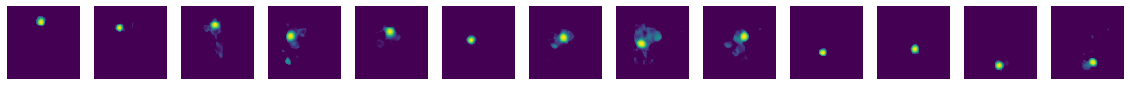

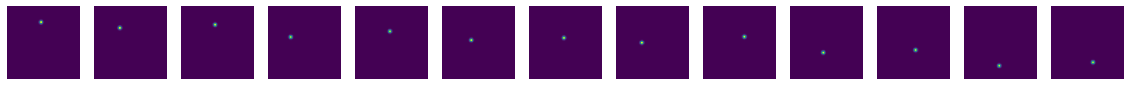

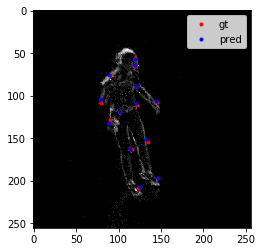

In [290]:
display(preds[2].numpy())
display(y[2].numpy())
plot_2d(x[2].squeeze(), gt_joints[2], p_joints[2])

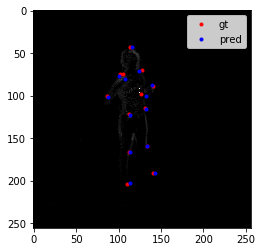

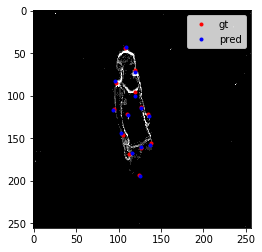

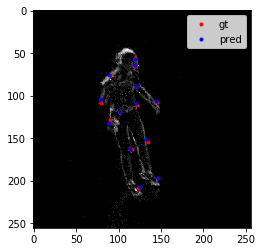

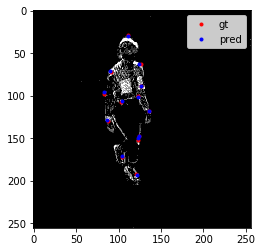

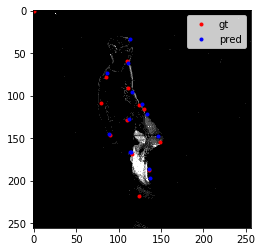

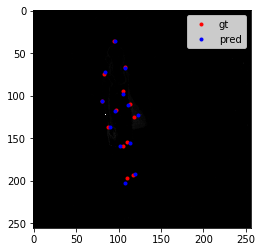

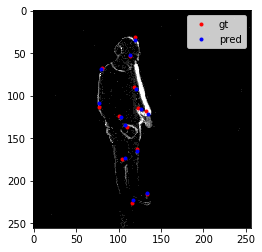

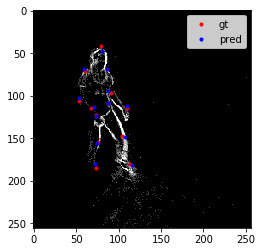

In [304]:
for i in range(0, 8):
    plot_2d(x[i].squeeze(), gt_joints[i], p_joints[i])